### Set up the virtual enviroment to avoid conflicts 

In [1]:
# Create the virtual enviroment
# Conda create --name name python=3.12.2
# !pip install ipykernel

### Install the necesary libraries

In [2]:
#!pip install  matplotlib numpy pandas scipy scikit-learn

### Import the libraries

In [3]:
import os # For system paths
import tarfile # To open tar files
import urllib # To download data from internet
import logging # Logging information

import pandas as pd # Dataframe manipulation
import numpy as np # Math
import matplotlib.pyplot as mp # Data Viz


## Import data

In [4]:
new_path = None
def create_folder(folder_name:str):
    """
    Create a folder in the main data folder.

    Args:
        folder_name: Selected name for the resulting folder 
    Returns:
        housing_path: Path to the created folder
    """
    global new_path
    try:
        current_path = os.path.abspath(os.getcwd())
        new_path = os.path.join(current_path,"data",folder_name)
        os.makedirs(new_path,exist_ok=True)
        logging.info(f"Directory creation succesful. Folder created {folder_name}")
        return new_path
    except Exception :
        raise logging.info (f"Folder creation failed. Error generated {Exception}")

download_url = "https://github.com/ageron/handson-ml2/raw/master/datasets/housing/housing.tgz"

def fetch_data(url:str, folder_name:str):
    """
    Fetch data from an specified URL and downloads it into a new folder named folder_name.

    Args:
        url: URL for the information required.
        folder_name: name of the folder to create
    Returns:
        None
    
    """
    global new_path
    try:
        new_path = create_folder(folder_name)
        urllib.request.urlretrieve(download_url,os.path.join(new_path,"housing.tgz"))
        data_tgz = tarfile.open(os.path.join(new_path,"housing.tgz"))
        data_tgz.extractall(path=new_path, )
        data_tgz.close()
        logging.info(f"Data retrieval succesful.")
        return new_path
    except Exception:
        raise logging.info(f"Data retrieval failed. See {Exception}")



def load_data(path=new_path) ->pd.DataFrame :
    """
    Function to load the downloaded dataset directly from the initial path.

    Arg: 
        path: Path to the CSV file
    Returns:
        Dataframe
    """
    df = pd.read_csv(os.path.join(new_path,"housing.csv"))
    return df

In [5]:
fetch_data(download_url,"housing")

housing = load_data() 

## Data Understanding

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


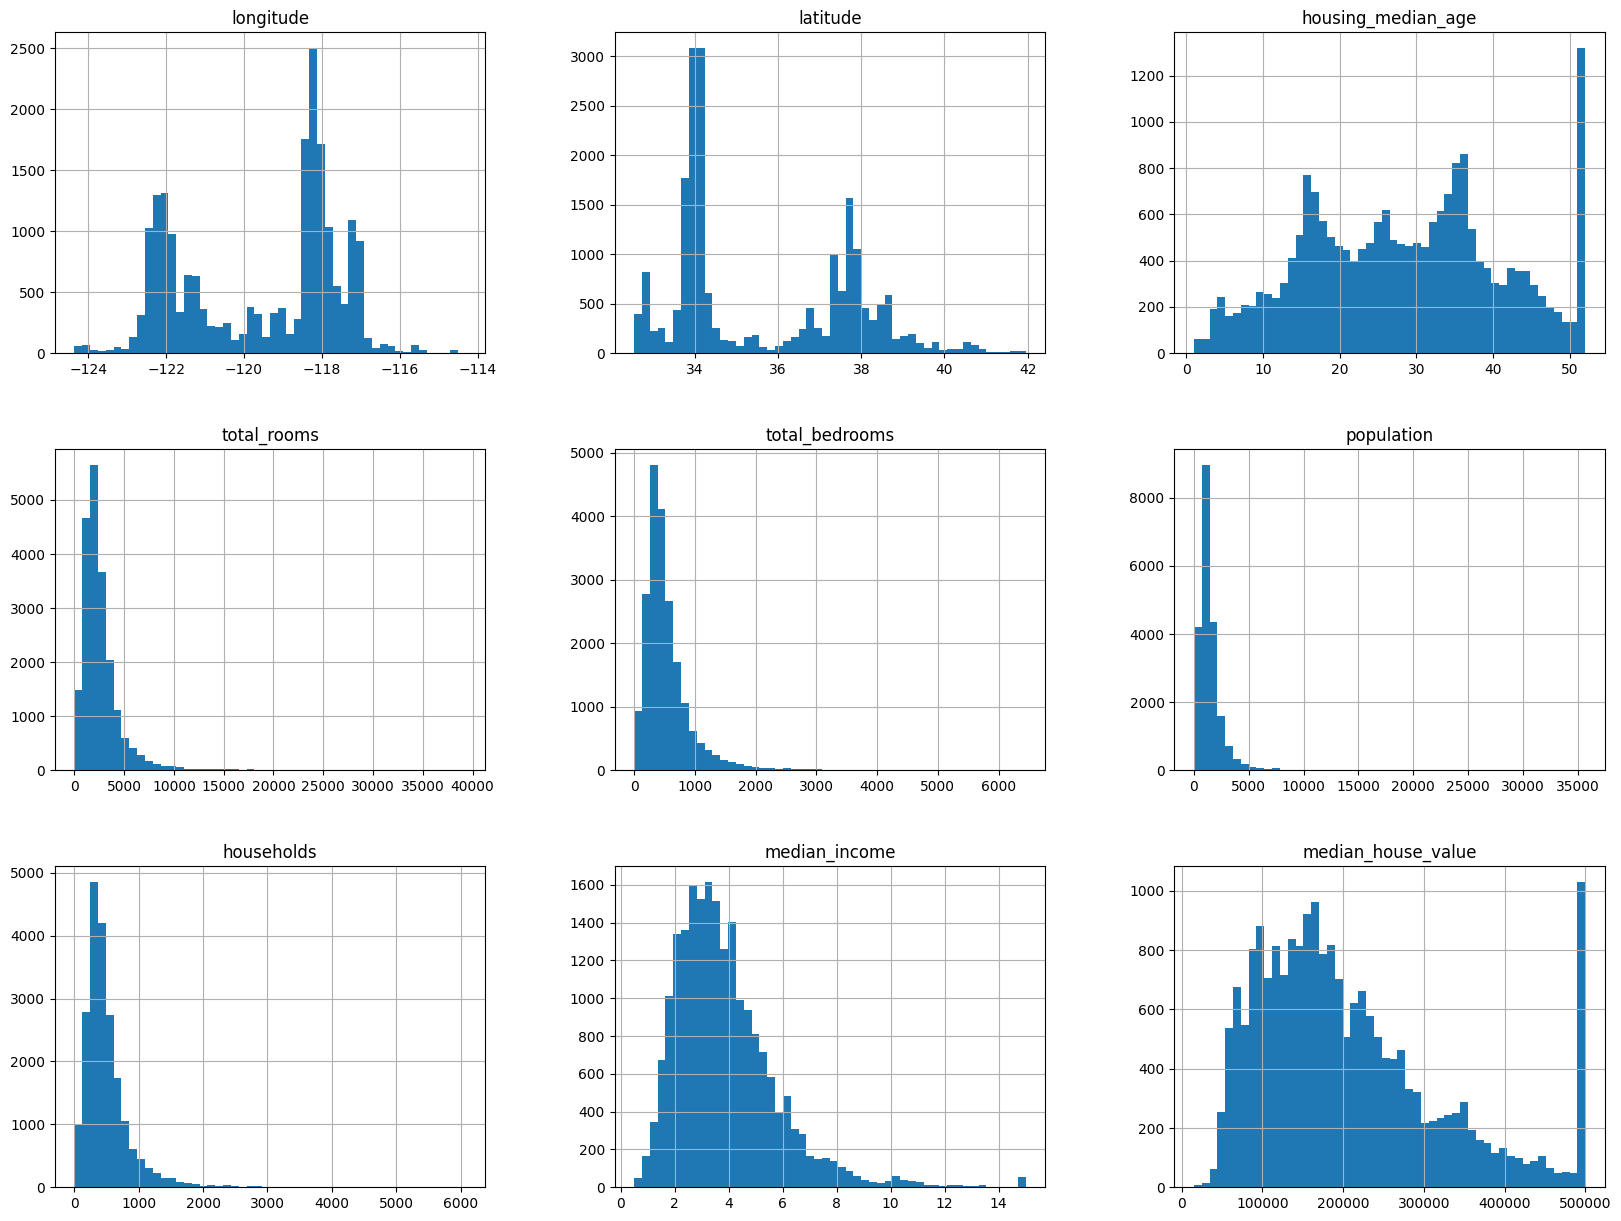

In [9]:
%matplotlib inline
housing.hist(bins=50, figsize=(20,15))
mp.show()

## Creation of the income category variable
This is because median_income is a key feature to predict median housing prices so we have to make sure we do not introduce any sampling bias when splitting the training and testing sets.

In [11]:
housing["income_cat"] = pd.cut(
    housing["median_income"],
    bins=[0,1.5,3,4.5,6,np.inf],
    labels=[1,2,3,4,5]
)

<Axes: >

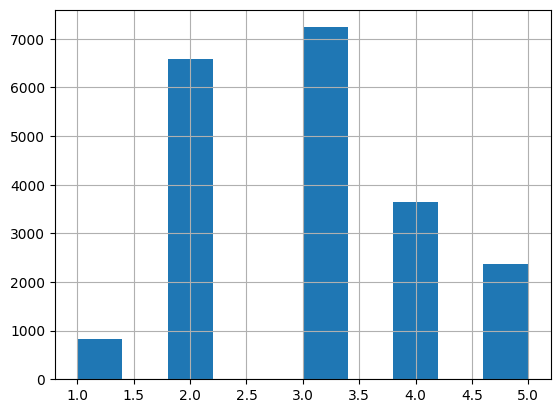

In [12]:
housing.income_cat.hist()

## Creation of the testing set - 
### Which we will not use until the model evaluation section.

In [20]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(housing,test_size=0.2, random_state=123, stratify=housing["income_cat"])
print(train.shape)
print(test.shape)

print("Results of stratification in train set \n" , train.income_cat.value_counts()/len(train))
print("------------------------")
print("Results of stratification in test set \n" ,test.income_cat.value_counts()/len(test))

for var in (train,test):
    var.drop("income_cat",axis=1,inplace=True)


(16512, 11)
(4128, 11)
Results of stratification in train set 
 income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64
------------------------
Results of stratification in test set 
 income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64


## Exploring the training test
It is important to explore the training data we will be working on to retrieve any relevant information.

<Axes: xlabel='longitude', ylabel='latitude'>

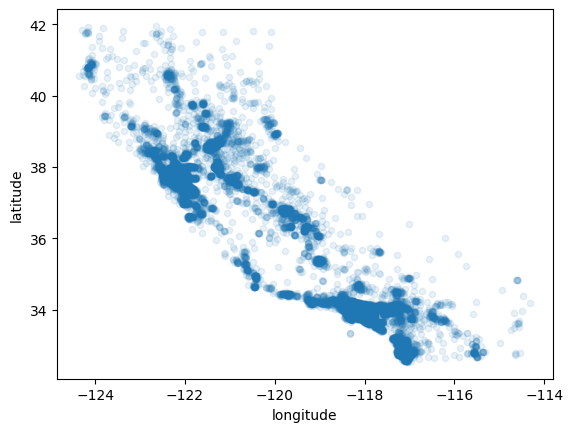

In [24]:
# Copy the trainin set so we do not harm it.
housing_t = train.copy()

# Explore geographical data
housing_t.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)
    # It does look like california after all with all the mainly populated areas such as LA, San Diego, the Bay Area and the Central Valley.


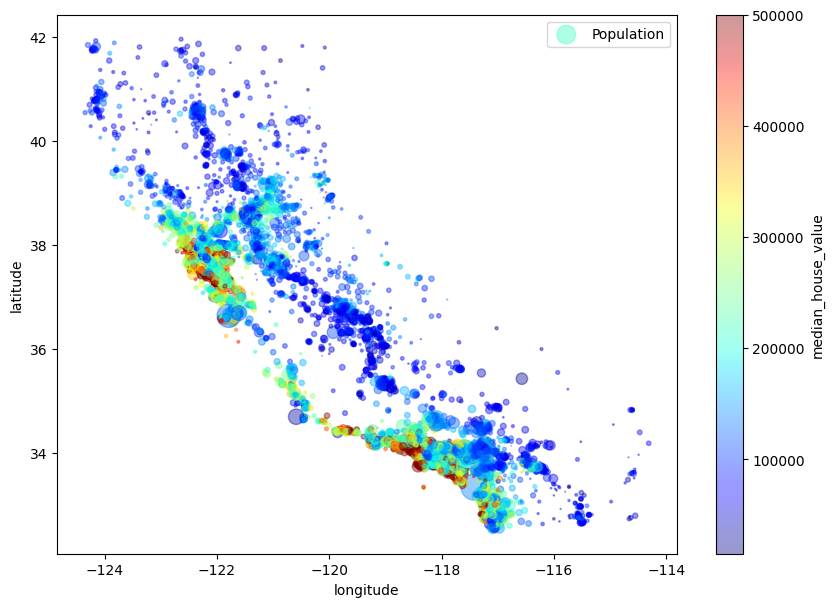

In [30]:
# Now using median house values

housing_t.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
               s=housing_t["population"]/100, # Radius of each circle represent the districts population - Divided by 100 so it fits in the graph
               label="Population",
               figsize=(10,7),
               c="median_house_value", # Color represents value
               cmap=mp.get_cmap("jet"), # Predefined color map - Blue for low values to red in high values
               colorbar=True)

mp.legend() 



### Important notes out of the median house values:
1. Proximity to coastline is important to define the house value. However, the rule does not work at all in the northern part of California.
2. Prices are very much related to population density - as we already know-. Nontheless, a clustering algorithm may be useful to find the main populated areas and their distance to the house evaluated as a new freature.